In [2]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [3]:
used_ts = 1:25
cart40_ts = 1:25

cart10_ts = 1:7
thin_used_ts = 1:7

colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-scale")
;

In [4]:
function loadDataFrame(mode, opts)
    if mode == :cart10; mstr = "cart10"
    elseif mode == :cart40; mstr = "cart40"
    else error("Unsupported mode: $(mode)")
    end
    
    if opts == :deepsdp; ostr = "deepsdp"
    elseif opts == :deepsdpdual; ostr = "deepsdp__dual"
    elseif opts == :chordal; ostr = "chordal__single_decomp"
    elseif opts == :chordal2; ostr = "chordal__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
    filepath = joinpath(DUMP_DIR, "$(mstr)_$(ostr).csv")
    return CSV.File(filepath)
end

cart10_deepsdp_df = loadDataFrame(:cart10, :deepsdp)
cart10_deepsdp_dual_df = loadDataFrame(:cart10, :deepsdpdual)
cart10_chordal_df = loadDataFrame(:cart10, :chordal)
cart10_chordal2_df = loadDataFrame(:cart10, :chordal2)


;

In [11]:
# [cart10_deepsdp_df[:obj_val] cart10_chordal2_df[:obj_val]]

In [13]:
length(cart10_deepsdp_df)
cart10_deepsdp_df[:t]

7-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7

In [23]:
# dfs are ordered by t
function plotDataFrames(batch; kwargs...)
    marker_size = 6
    plt = plot()
    for (df, label, color) in batch
        ts = df[:t]
        num_ts = length(ts)
        plot!(plt, 1:num_ts, df.total_secs,
            color = color,
            marker = (:circle, marker_size),
            label = label)
    end
    plt = plot!(plt; kwargs...)
    return plt
end

plotDataFrames (generic function with 1 method)

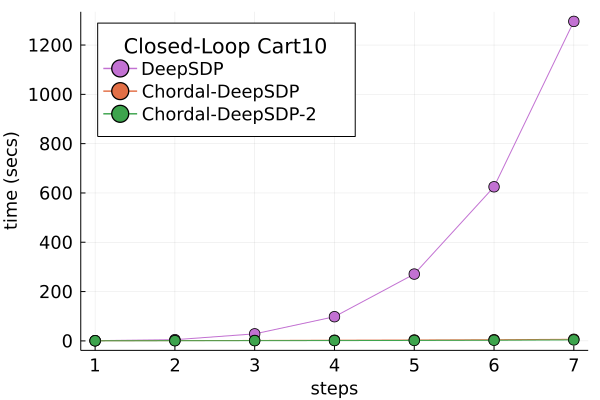

In [29]:
batch = [(cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)


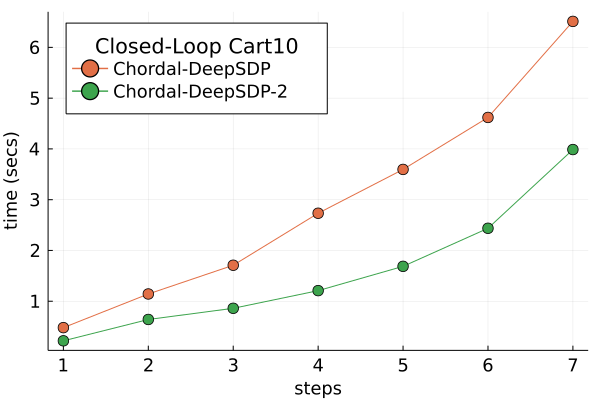

In [30]:
batch = [
         # (cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)


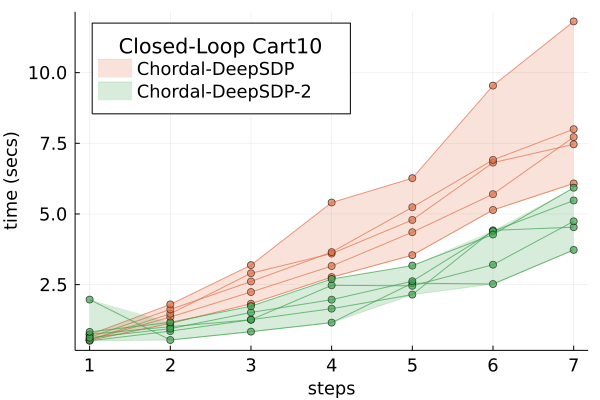

In [13]:
batch = [
#        (thin_deepsdp_dfs, "DeepSDP", colors[4]),
#          (thin_deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (thin_chordal_dfs, "Chordal-DeepSDP", colors[2]),
         (thin_chordal2_dfs, "Chordal-DeepSDP-2", colors[3])   
        ]
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)
fs = 12
plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs, legendtitlefontsize=fs+2)

savefig(plt, joinpath(DUMP_DIR, "scale-chordal-vs-chordal2.png"))
plt

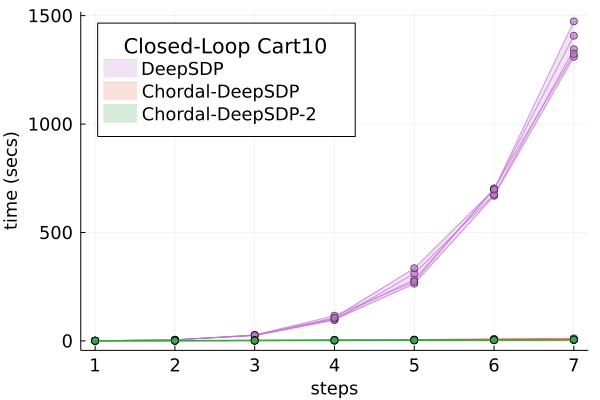

In [16]:
batch = [(thin_deepsdp_dfs, "DeepSDP", colors[4]),
#          (thin_deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (thin_chordal_dfs, "Chordal-DeepSDP", colors[2]),
         (thin_chordal2_dfs, "Chordal-DeepSDP-2", colors[3])   
        ]
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)
    
fs = 12
plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs, legendtitlefontsize=fs+2)

savefig(plt, joinpath(DUMP_DIR, "scale-deep-vs-chordal-vs-chordal2.png"))

plt

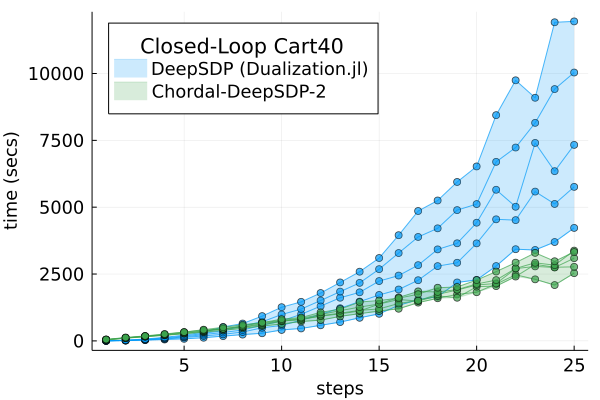

In [15]:
batch = [(deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (chordal2_dfs, "Chordal-DeepSDP-2", colors[3])]

plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart40",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)


fs = 12
plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs, legendtitlefontsize=fs+2)
savefig(plt, joinpath(DUMP_DIR, "scale-deepdual-vs-chordal2.png"))
plt